In [41]:
import gym
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

### Q-table

In [2]:
environment = gym.make('FrozenLake-v0')

[2018-02-21 12:10:10,048] Making new env: FrozenLake-v0


In [49]:
#Initialization
Q_table = np.zeros([environment.observation_space.n, environment.action_space.n])
learning_rate = 0.8
gamma = 0.95
number_of_episodes = 2000

#Rewards
rewards_list = []

#Algorithm
for i in range(number_of_episodes) :
    state = environment.reset()
    all_rewards = 0
    done = False
    step = 0
    while(step < 99) :
        step += 1
        #Choose action greedily
        action = np.argmax(Q_table[state,:] + np.random.randn(1, environment.action_space.n) * (1.0 / (i + 1)))
        #Get next state and reward from environment
        next_state, reward, done, _ = environment.step(action)
        #Update Q-Table with new knowledge
        Q_table[state, action] = Q_table[state, action] + \
            learning_rate * (reward + gamma * np.max(Q_table[next_state,:]) - Q_table[state, action])
        all_rewards += reward
        state = next_state
        if done == True:
            break   
    rewards_list.append(all_rewards)

In [50]:
print("Total score over all episodes: " + str(sum(rewards_list) / number_of_episodes))

Total score over all episodes: 0.5485


In [26]:
print("Final Q-table")
print(Q_table)

Final Q-table
[[  2.11798189e-01   6.38349938e-03   6.14916583e-03   6.43297620e-03]
 [  1.36716665e-03   1.14366161e-04   4.48867159e-05   2.30736191e-01]
 [  9.14618348e-03   2.08268001e-03   0.00000000e+00   2.72559481e-01]
 [  0.00000000e+00   5.17179477e-03   0.00000000e+00   1.13091572e-01]
 [  3.49668437e-01   1.26903425e-03   5.26101937e-03   6.67301057e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  2.72906720e-01   1.80345635e-06   9.02045240e-04   6.84848815e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.39450799e-03   0.00000000e+00   6.09844808e-01]
 [  4.49534377e-03   5.39880186e-01   0.00000000e+00   1.06073696e-02]
 [  9.07139349e-01   1.28586708e-03   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   7.57610759e-01   0.000000

### Running one game

In [39]:
state = environment.reset()
print("Current state: " + str(state) + " Reward: 0")
done = False
while(done == False) :
    action = np.argmax(Q_table[state, :])
    state, reward, done, _ = environment.step(action)
    print("Current state: "+ str(state) + " Reward: " + str(reward))

Current state: 0 Reward: 0
Current state: 4 Reward: 0.0
Current state: 0 Reward: 0.0
Current state: 0 Reward: 0.0
Current state: 4 Reward: 0.0
Current state: 4 Reward: 0.0
Current state: 4 Reward: 0.0
Current state: 8 Reward: 0.0
Current state: 9 Reward: 0.0
Current state: 10 Reward: 0.0
Current state: 9 Reward: 0.0
Current state: 8 Reward: 0.0
Current state: 8 Reward: 0.0
Current state: 8 Reward: 0.0
Current state: 9 Reward: 0.0
Current state: 8 Reward: 0.0
Current state: 4 Reward: 0.0
Current state: 0 Reward: 0.0
Current state: 4 Reward: 0.0
Current state: 4 Reward: 0.0
Current state: 0 Reward: 0.0
Current state: 0 Reward: 0.0
Current state: 4 Reward: 0.0
Current state: 0 Reward: 0.0
Current state: 4 Reward: 0.0
Current state: 8 Reward: 0.0
Current state: 4 Reward: 0.0
Current state: 8 Reward: 0.0
Current state: 9 Reward: 0.0
Current state: 13 Reward: 0.0
Current state: 13 Reward: 0.0
Current state: 14 Reward: 0.0
Current state: 15 Reward: 1.0


### Q-network

In [71]:
environment = gym.make("FrozenLake-v0")

[2018-02-22 08:55:05,392] Making new env: FrozenLake-v0


### Setting up network

In [72]:
tf.reset_default_graph

<function tensorflow.python.framework.ops.reset_default_graph>

In [73]:
inputs = tf.placeholder(shape=[1, 16], dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16, 4], 0, 0.01))
q_outputs = tf.matmul(inputs, W)
prediction = tf.argmax(q_outputs, 1)

next_q = tf.placeholder(shape=[1,4], dtype=tf.float32)
loss = tf.reduce_sum(tf.square(next_q - q_outputs))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
training_optimize = optimizer.minimize(loss)

### Training network

In [74]:
init = tf.global_variables_initializer()

gamma = 0.99
epsilon = 0.1
number_of_episodes = 2000

steps_list = []
rewards_list = []

with tf.Session() as sess :
    sess.run(init)
    for i in range(number_of_episodes) :
        state = environment.reset()
        all_rewards = 0
        step = 0
        done = False
        
        if(i % 100 == 0) :
            print("On episode: " + str(i))
        
        while(step < 99) :
            step += 1
            
            #Choose action greedily
            action, all_q_values = \
                sess.run([prediction, q_outputs], feed_dict={inputs : np.identity(16)[state : state + 1]})
            if np.random.rand(1) < epsilon :
                action[0] = environment.action_space.sample()
            
            #Get new state
            next_state, reward, done, _ = environment.step(action[0])
            
            #Obtain Q values for next state
            next_q_values = sess.run(q_outputs, feed_dict={inputs : np.identity(16)[next_state : next_state + 1]})
            
            #Get max q value and set target
            max_q = np.max(next_q_values)
            target_q = all_q_values
            target_q[0, action[0]] = reward + gamma * max_q
            
            #Train network
            _, next_W = \
                sess.run([training_optimize, W], feed_dict={inputs : np.identity(16)[state : state + 1], next_q : target_q})
            all_rewards += reward
            state = next_state
            
            if done == True :
                #Reduce chance of random action
                e = 1.0 / ((i / 50) + 10)
                break
        steps_list.append(step)
        rewards_list.append(all_rewards)
print("Succesful episodes: " + str((sum(rewards_list) / number_of_episodes) * 100) + "%")

On episode: 0
On episode: 100
On episode: 200
On episode: 300
On episode: 400
On episode: 500
On episode: 600
On episode: 700
On episode: 800
On episode: 900
On episode: 1000
On episode: 1100
On episode: 1200
On episode: 1300
On episode: 1400
On episode: 1500
On episode: 1600
On episode: 1700
On episode: 1800
On episode: 1900
Succesful episodes: 23.549999999999997%


### Analysis

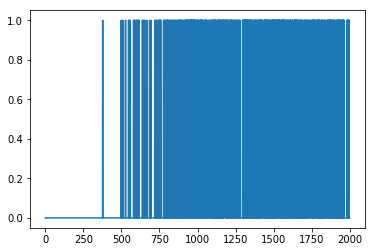

In [75]:
#Reward per episode
plt.plot(rewards_list)

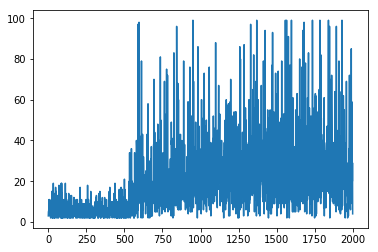

In [76]:
#Nr of steps per episode
plt.plot(steps_list)